In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
labels_paths = pd.read_csv('ptbxl_database.csv')
labels_paths = labels_paths[['scp_codes', 'filename_hr']]
labels_paths.rename(columns={'scp_codes': 'label',
                    'filename_hr': 'path'}, inplace=True)
labels_paths.head()

,label,path
0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records500/00000/00001_hr
1,"{'NORM': 80.0, 'SBRAD': 0.0}",records500/00000/00002_hr
2,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00003_hr
3,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00004_hr
4,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00005_hr


In [4]:
labels_paths['first_value'] = labels_paths['label'].str.extract(r"'([^']*)'")

# Update the 'label' column with the extracted values
labels_paths['label'] = labels_paths['first_value'].fillna(
    labels_paths['label'])

# Drop the 'first_value' column as it's no longer needed
labels_paths.drop(columns=['first_value'], inplace=True)

labels_paths

,label,path
0,NORM,records500/00000/00001_hr
1,NORM,records500/00000/00002_hr
2,NORM,records500/00000/00003_hr
3,NORM,records500/00000/00004_hr
4,NORM,records500/00000/00005_hr
...,...,...
21832,NDT,records500/21000/21833_hr
21833,NORM,records500/21000/21834_hr
21834,ISCAS,records500/21000/21835_hr
21835,NORM,records500/21000/21836_hr


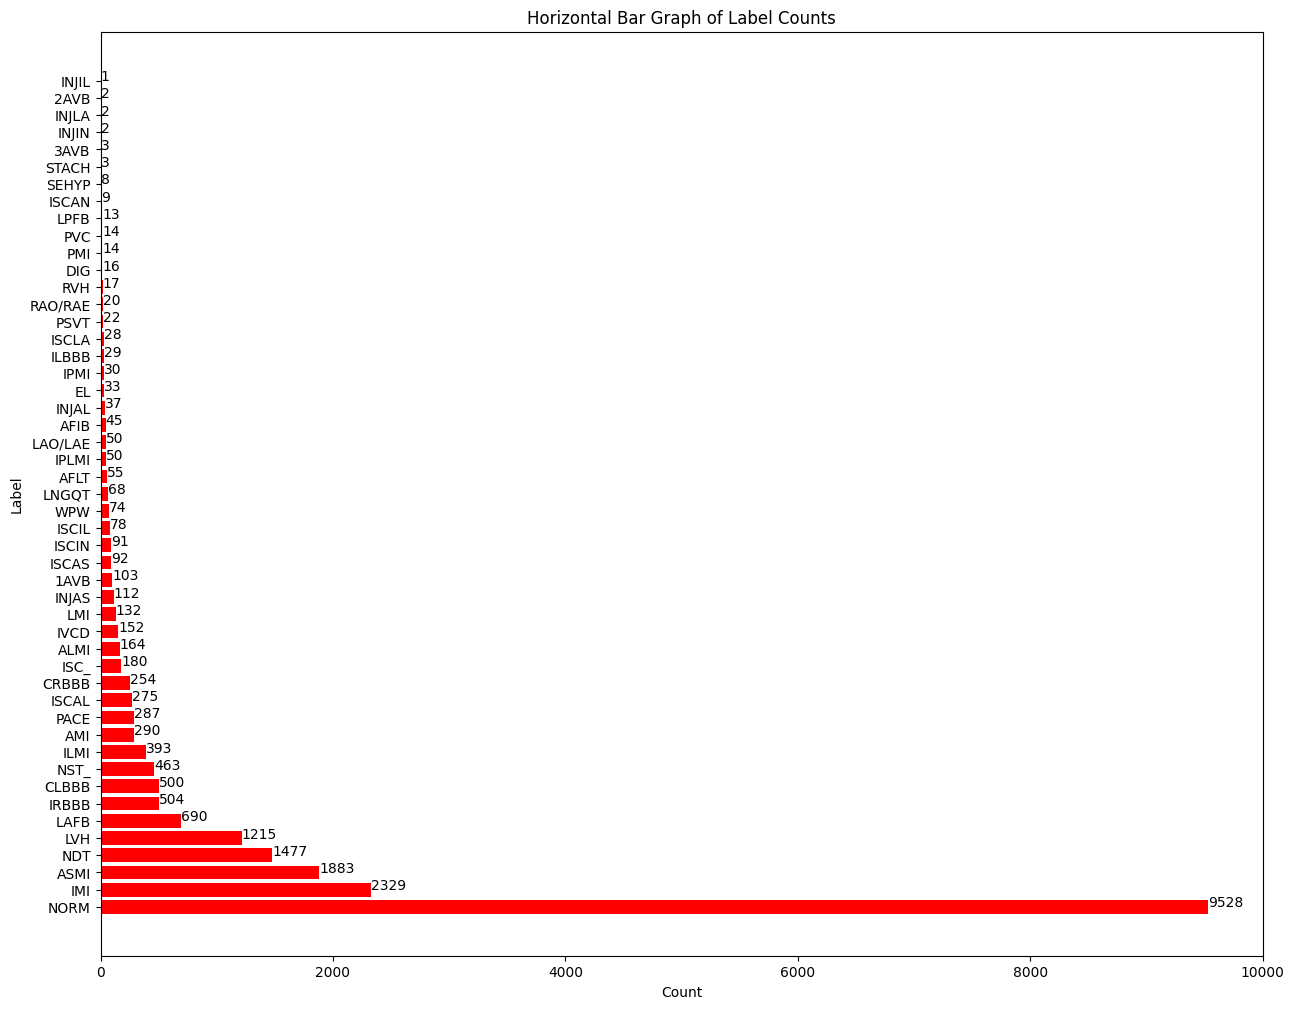

In [26]:
dist = labels_paths['label'].value_counts()
dist = pd.DataFrame(dist)
dist.reset_index(inplace=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(15, 12))
plt.barh(dist['label'], dist['count'], color='red')
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Horizontal Bar Graph of Label Counts')

# Show count on the bars
for index, value in enumerate(dist['count']):
    plt.text(value, index,
             str(value))

plt.show()

In [33]:
# Read the CSV file
class_subclass = pd.read_csv('scp_statements.csv')

# Select columns 'diagnostic_class' and 'diagnostic_subclass'
class_subclass = class_subclass[['Unnamed: 0',
                                 'diagnostic_class', 'diagnostic_subclass']]

# Rename columns
class_subclass.rename(columns={'Unnamed: 0': 'id', 'diagnostic_class': 'class',
                      'diagnostic_subclass': 'subclass'}, inplace=True)

# Remove rows with missing values
class_subclass.dropna(inplace=True)

class_subclass

,id,class,subclass
0,NDT,STTC,STTC
1,NST_,STTC,NST_
2,DIG,STTC,STTC
3,LNGQT,STTC,STTC
4,NORM,NORM,NORM
5,IMI,MI,IMI
6,ASMI,MI,AMI
7,LVH,HYP,LVH
8,LAFB,CD,LAFB/LPFB
9,ISC_,STTC,ISC_


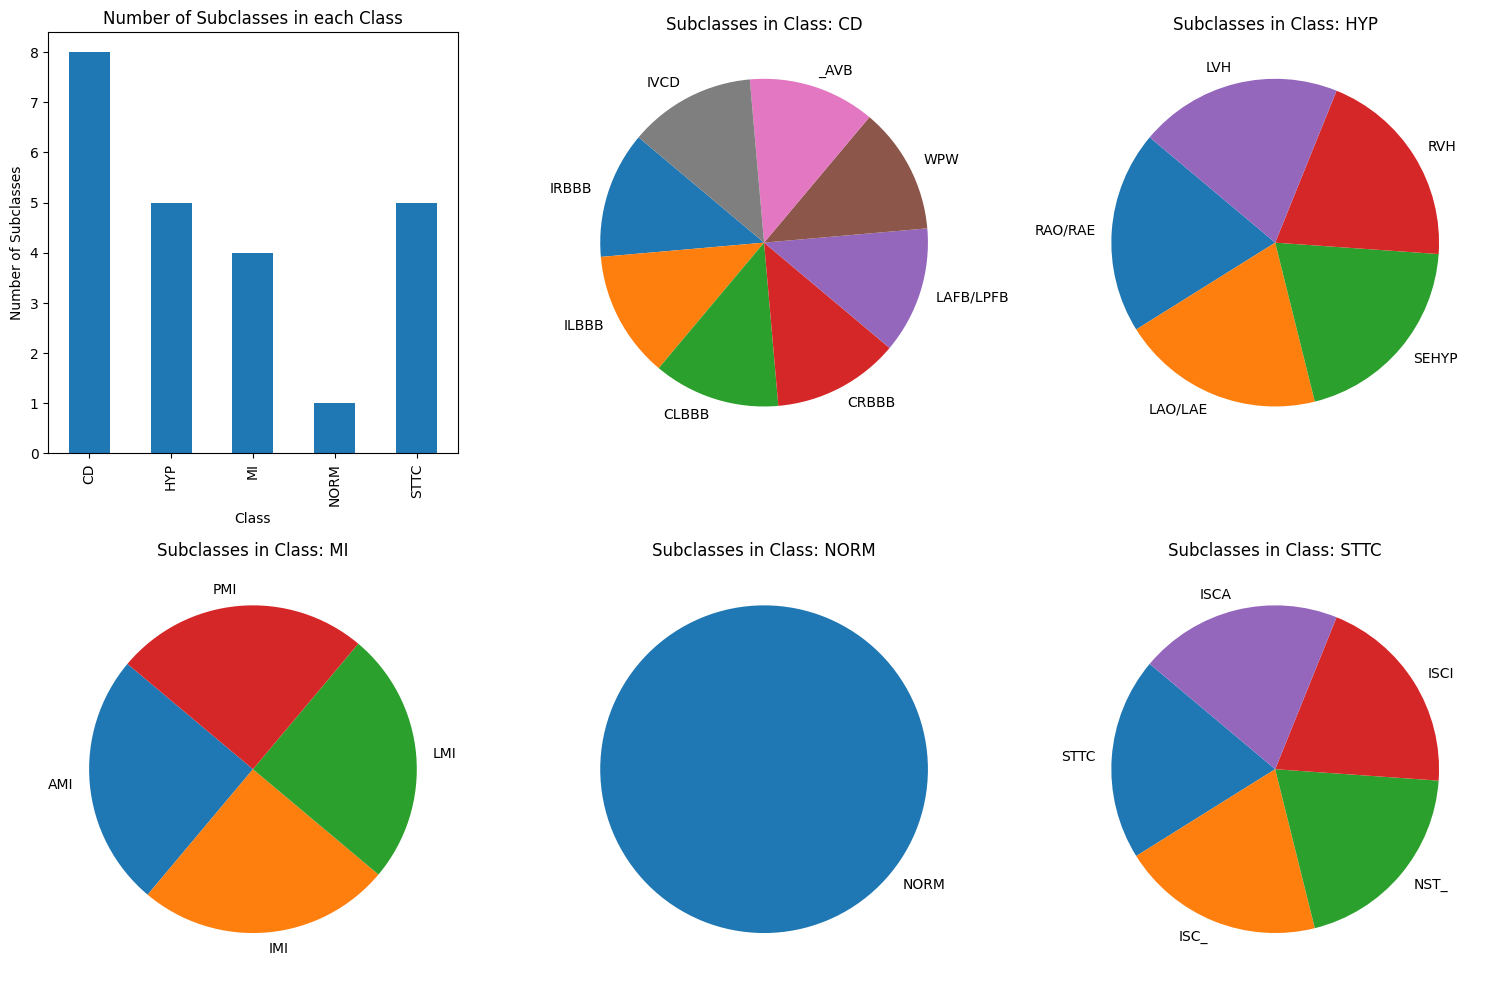

In [35]:

# Group by 'class' and then list all unique 'subclass' in each 'class'
class_subclass_grouped = class_subclass.groupby('class')['subclass'].unique()

# Plot the grouped data as a bar chart and donut charts for each class as subplots
num_classes = len(class_subclass_grouped)
num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot the bar chart for number of subclasses in each class
class_subclass_grouped.apply(len).plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_xlabel('Class')
axs[0, 0].set_ylabel('Number of Subclasses')
axs[0, 0].set_title('Number of Subclasses in each Class')

# Plot donut charts for subclasses within each class
for i, (index, row) in enumerate(class_subclass_grouped.items()):
    subclass_counts = dict(Counter(row))
    labels = subclass_counts.keys()
    sizes = subclass_counts.values()

    row_index = (i + 1) // num_cols
    col_index = (i + 1) % num_cols

    axs[row_index, col_index].pie(sizes, labels=labels, startangle=140)
    axs[row_index, col_index].set_title(f'Subclasses in Class: {index}')

# Hide empty subplots if there are fewer than 6 classes
for i in range(num_classes + 1, num_rows * num_cols):
    axs[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()
plt.show()

In [46]:
class_paths = pd.merge(labels_paths, class_subclass,
                       left_on='label', right_on='subclass', how='left')

class_paths = pd.merge(class_paths, class_subclass,
                       left_on='label', right_on='id', how='left')

# Keep only the columns of interest
class_paths = class_paths[['path', 'class_y', 'label']]
class_paths.rename(columns={'class_y': 'class'}, inplace=True)

class_paths

,path,class,label
0,records500/00000/00001_hr,NORM,NORM
1,records500/00000/00002_hr,NORM,NORM
2,records500/00000/00003_hr,NORM,NORM
3,records500/00000/00004_hr,NORM,NORM
4,records500/00000/00005_hr,NORM,NORM
...,...,...,...
21832,records500/21000/21833_hr,STTC,NDT
21833,records500/21000/21834_hr,NORM,NORM
21834,records500/21000/21835_hr,NaN,ISCAS
21835,records500/21000/21836_hr,NORM,NORM


In [7]:
id_data_frame = pd.read_excel('D:\\Semester 7\\FYP\\id.xlsx')
id_data_frame.rename(columns={'diagnostic_class': 'class'}, inplace=True)
id_data_frame

,id,class
0,NDT,STTC
1,NST_,STTC
2,DIG,STTC
3,LNGQT,STTC
4,NORM,NORM
5,IMI,MI
6,ASMI,MI
7,LVH,HYP
8,LAFB,CD
9,ISC_,STTC


In [8]:
import pandas as pd


# Merge based on 'id' column to fill in empty values in df1['class']
merged_df = merged_df.merge(
    id_data_frame, left_on='subclass', right_on='id', how='left')


print(merged_df)

                            path subclass class_x     id class_y
0      records500/00000/00001_hr     NORM    NORM   NORM    NORM
1      records500/00000/00002_hr     NORM    NORM   NORM    NORM
2      records500/00000/00003_hr     NORM    NORM   NORM    NORM
3      records500/00000/00004_hr     NORM    NORM   NORM    NORM
4      records500/00000/00005_hr     NORM    NORM   NORM    NORM
...                          ...      ...     ...    ...     ...
21832  records500/21000/21833_hr      NDT     NaN    NDT    STTC
21833  records500/21000/21834_hr     NORM    NORM   NORM    NORM
21834  records500/21000/21835_hr    ISCAS     NaN  ISCAS    STTC
21835  records500/21000/21836_hr     NORM    NORM   NORM    NORM
21836  records500/21000/21837_hr     NORM    NORM   NORM    NORM

[21837 rows x 5 columns]


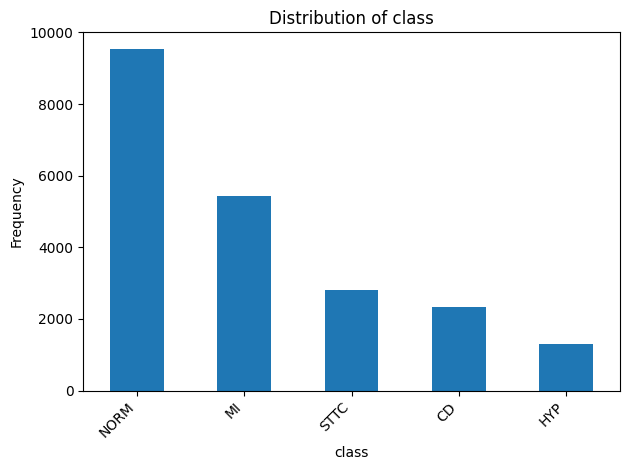

In [9]:
# Plot the distribution of labels
label_counts = merged_df['class_y'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title('Distribution of class')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [10]:
import pandas as pd

# Assuming merged_df is already defined with 'class_y' column
# Count the occurrences of each class
class_counts = merged_df['class_y'].value_counts()

# Print the count for each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: NORM, Count: 9528
Class: MI, Count: 5439
Class: STTC, Count: 2810
Class: CD, Count: 2324
Class: HYP, Count: 1310


In [11]:
import pandas as pd

# Assuming your DataFrame is named df
# Drop columns 'subclass', 'id', and 'class_x'
merged_df.drop(['subclass', 'id', 'class_x'], axis=1, inplace=True)
# Remove rows with missing values in 'class_y' column
merged_df.dropna(subset=['class_y'], inplace=True)
# Rename 'class_y' to 'class'
merged_df.rename(columns={'class_y': 'class'}, inplace=True)

# If you want to reset the index after dropping rows
merged_df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
merged_df

,path,class
0,records500/00000/00001_hr,NORM
1,records500/00000/00002_hr,NORM
2,records500/00000/00003_hr,NORM
3,records500/00000/00004_hr,NORM
4,records500/00000/00005_hr,NORM
...,...,...
21406,records500/21000/21833_hr,STTC
21407,records500/21000/21834_hr,NORM
21408,records500/21000/21835_hr,STTC
21409,records500/21000/21836_hr,NORM


In [ ]:
merged_df.to_csv(
    'D:\\Semester 7\\FYP\\preprocessing\\final_labels.csv', index=False)